In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import scipy.stats as st
import time
import json
import os

import gmaps

from config import api_key

from config2 import api_key as g_key


from citipy import citipy

output_data_file = "outputcities.csv"

lat_range = (-90,90)

long_range = (-180,180)

lat_lngs = []

cities = []

lats = np.random.uniform(lat_range[0], lat_range[1], 1500)
longs = np.random.uniform(long_range[0], long_range[1], 1500)


ll_tup = zip(lats, longs)

gen = (list(ele) for ele in ll_tup)

lat_lngs = list(gen)

#print(lat_lngs)



for i in lat_lngs:
    
        city = citipy.nearest_city(i[0], i[1]).city_name
    
        if city not in cities:
        
            cities.append(city)
            
           
            




In [2]:
len(cities)

624

In [58]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="


latitude = []

longitude = []

temperature = []

country = []

humidity = []

windiness = []

cloudiness = []

for i in cities:
     
        
    target_url = base_url + i + "&appid=" + api_key
        
    try:
       
        
        
            response = requests.get(target_url).json()
            
            city_country = response["sys"]["country"]
        
            city_temp = response["main"]["temp"]
            
            city_lat = response["coord"]["lat"]
            
            city_long = response["coord"]["lon"]
            
            city_hum = response["main"]["humidity"]
            
            city_wind = response["wind"]["speed"]
            
            city_cloud = response["clouds"]["all"]
            
            country.append(city_country)
            
            cloudiness.append(city_cloud)
            
            windiness.append(city_wind)
            
            humidity.append(city_hum)
        
            temperature.append(city_temp)
            
            longitude.append(city_long)
            
            latitude.append(city_lat)
        
        

            print('Processing' + i)

    except:
    
            print('No city, passing')
    

Processingbredasdorp
Processingclyde river
Processingketchikan
Processingcidreira
Processingtiksi
Processingmachacamarca
No city, passing
Processingmirnyy
Processinggeorgetown
Processingvostok
No city, passing
Processingkapaa
Processingkodiak
Processingporto-vecchio
Processingsorong
Processingrikitea
Processingsile
Processingyellowknife
Processingfortuna
Processingerzin
Processingbluff
Processinghilo
Processinghusavik
Processingkaitangata
Processingbusselton
Processingkaeo
Processingmaniitsoq
Processingnicolas de pierola
Processinghermanus
Processingalbany
Processingarraial do cabo
Processingcoaldale
Processingbambous virieux
Processingjamestown
Processingmahebourg
No city, passing
No city, passing
Processinghithadhoo
Processingcoquimbo
Processingushuaia
Processingostrovnoy
Processingprovideniya
Processingkavaratti
Processingquatre cocos
No city, passing
Processingdikson
Processingqaanaaq
Processingesperance
Processingfelanitx
Processingatuona
Processingcayenne
Processingpunta arenas
P

Processingsan cristobal
Processinglaval
No city, passing
Processingkiama
No city, passing
Processingbengkulu
Processingtakoradi
No city, passing
Processingastoria
Processingluz
Processingtshikapa
No city, passing
Processingsan benito
Processingqax
Processingporto santo
Processingsistranda
Processinghamilton
Processingnueva rosita
Processingdeer lake
Processingkalabo
Processingomboue
Processingjalu
Processingaloleng
Processingatasu
Processingthe pas
Processingbasqal
Processingbanda aceh
Processingbardiyah
Processingpuerto carreno
Processingvalparaiso
Processingliberal
Processingguerrero negro
Processingbuala
Processingquang ngai
Processingstromness
Processingtuatapere
Processingsanta rosalia
Processingmadanapalle
Processingbaker city
Processingokakarara
Processingshu
Processingdarnah
Processingasau
Processingsawakin
Processingcamana
Processingusilampatti
Processinggulfport
Processingtalas
Processingborovoy
Processinguglekamensk
Processingbagamer
Processingport lincoln
Processingsaint pa

In [60]:
bigframe = pd.DataFrame(list(zip(cities, country, latitude, longitude, temperature, humidity, windiness, cloudiness)), columns=['city','country','latitude','longitude','temperature','humidity','windiness','cloudiness'])

In [61]:
bigframe.head()

,city,country,latitude,longitude,temperature,humidity,windiness,cloudiness
0,bredasdorp,ZA,-34.53,20.04,284.15,93,2.44,36
1,clyde river,CA,70.47,-68.59,276.15,93,4.60,20
2,ketchikan,US,55.34,-131.65,286.36,76,6.20,90
3,cidreira,BR,-30.18,-50.21,292.44,92,3.56,31
4,tiksi,RU,71.69,128.87,292.35,36,1.70,0


In [62]:
bigframe.describe()

#no humidity exceeds 100



,latitude,longitude,temperature,humidity,windiness,cloudiness
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,20.984058,15.616685,292.567681,70.485507,3.571757,48.418478
std,33.856510,90.294685,8.024509,21.483792,2.387264,37.790048
min,-54.800000,-179.170000,274.980000,3.000000,0.150000,0.000000
25%,-7.980000,-65.167500,286.495000,59.000000,1.797500,8.000000
50%,28.225000,19.835000,293.150000,76.000000,3.075000,41.500000
75%,49.765000,95.517500,299.150000,87.000000,5.100000,88.000000
max,78.220000,179.320000,312.640000,100.000000,15.400000,100.000000


In [7]:
frizzyhair = bigframe.index[bigframe['humidity'] > 100].tolist()






    
    

In [63]:
def tempconv(x):
    
    x = ((x - 273.15)* 1.8000) + 32.00
    
    return(x)

bigframe['temperature'] = bigframe['temperature'].apply(tempconv)
    
    

In [64]:
bigframe.head()

,city,country,latitude,longitude,temperature,humidity,windiness,cloudiness
0,bredasdorp,ZA,-34.53,20.04,51.800,93,2.44,36
1,clyde river,CA,70.47,-68.59,37.400,93,4.60,20
2,ketchikan,US,55.34,-131.65,55.778,76,6.20,90
3,cidreira,BR,-30.18,-50.21,66.722,92,3.56,31
4,tiksi,RU,71.69,128.87,66.560,36,1.70,0


In [65]:
bigframe.to_csv(output_data_file)

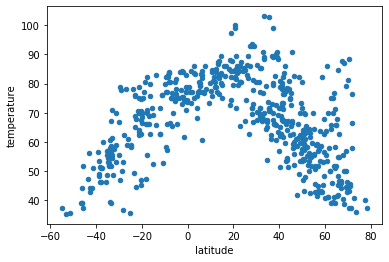

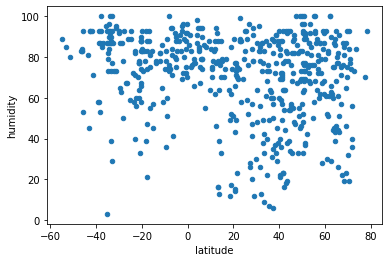

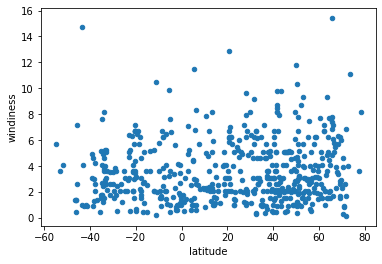

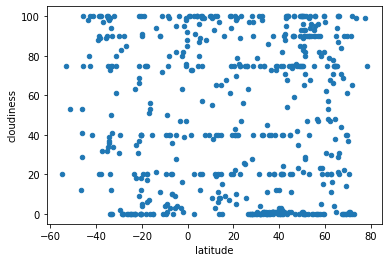

In [66]:
temp_scat = bigframe.plot.scatter('latitude', 'temperature')

hum_scat = bigframe.plot.scatter('latitude', 'humidity')

wind_scat = bigframe.plot.scatter('latitude', 'windiness')

cloud_scat = bigframe.plot.scatter('latitude','cloudiness')



In [67]:
tslope, tintercept, trvalue, tpvalue, tsomething = st.linregress(bigframe['latitude'],bigframe['temperature'])

hslope, hintercept, hrvalue, hpvalue, hsomething = st.linregress(bigframe['latitude'],bigframe['humidity'])

wslope, wintercept, wrvalue, wpvalue, wsomething = st.linregress(bigframe['latitude'],bigframe['windiness'])

cslope, cintercept, crvalue, cpvalue, csomething = st.linregress(bigframe['latitude'],bigframe['cloudiness'])

Text(0, 0.5, 'Temp (F)')

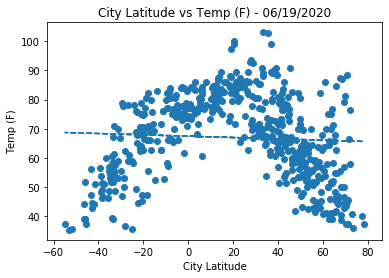

In [68]:
tlinfit = (bigframe['latitude'])*tslope + tintercept

plt.plot(bigframe['latitude'], tlinfit, "--")

plt.scatter(bigframe['latitude'], bigframe['temperature'])

plt.title('City Latitude vs Temp (F) - 06/19/2020')

plt.xlabel('City Latitude')

plt.ylabel('Temp (F)')

#this code is taking data by columns from the dataframe and plotting points using those columns 
#as x and y axis'. You can see that as points around the equator or much higher relative 
#than the points with higher absolute vlaues for latitude

Text(0, 0.5, 'Humidity')

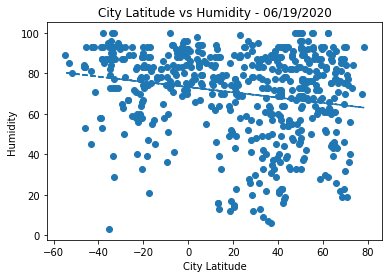

In [69]:
hlinfit = (bigframe['latitude'])*hslope + hintercept

plt.plot(bigframe['latitude'], hlinfit, "--")

plt.scatter(bigframe['latitude'], bigframe['humidity'])

plt.title('City Latitude vs Humidity - 06/19/2020')

plt.xlabel('City Latitude')

plt.ylabel('Humidity')

#the code here is pulling data from the humidity column and matching it against the latitude column.

Text(0, 0.5, 'Wind Speed (mph)')

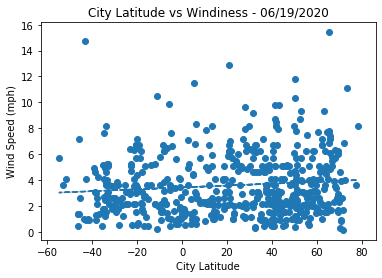

In [70]:
wlinfit = (bigframe['latitude'])*wslope + wintercept

plt.plot(bigframe['latitude'], wlinfit, "--")

plt.scatter(bigframe['latitude'], bigframe['windiness'])

plt.title('City Latitude vs Windiness - 06/19/2020')

plt.xlabel('City Latitude')

plt.ylabel('Wind Speed (mph)')

#this graph, along with the other graphs in this series are pulling data from all latitudes, not just norhtern or southern hemispheres.



Text(0, 0.5, 'Cloudiness (%)')

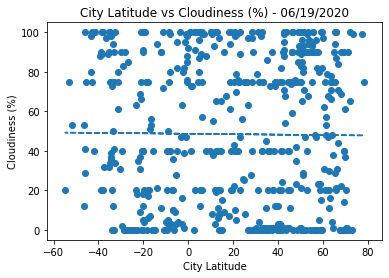

In [71]:
clinfit = (bigframe['latitude'])*cslope + cintercept

plt.plot(bigframe['latitude'], clinfit, "--")

plt.scatter(bigframe['latitude'], bigframe['cloudiness'])

plt.title('City Latitude vs Cloudiness (%) - 06/19/2020')

plt.xlabel('City Latitude')

plt.ylabel('Cloudiness (%)')

#doing this again, i might choose to create a function to save myself some typing.

In [72]:
n_df = pd.DataFrame(bigframe.loc[bigframe['latitude']> 0])

s_df = pd.DataFrame(bigframe.loc[bigframe['latitude']<0])

In [73]:
n_tslope, n_tintercept, n_trvalue, n_tpvalue, n_tsomething = st.linregress(n_df['latitude'],n_df['temperature'])

n_hslope, n_hintercept, n_hrvalue, n_hpvalue, n_hsomething = st.linregress(n_df['latitude'],n_df['humidity'])

n_wslope, n_wintercept, n_wrvalue, n_wpvalue, n_wsomething = st.linregress(n_df['latitude'],n_df['windiness'])

n_cslope, n_cintercept, n_crvalue, n_cpvalue, n_csomething = st.linregress(n_df['latitude'],n_df['cloudiness'])

In [74]:
s_tslope, s_tintercept, s_trvalue, s_tpvalue, s_tsomething = st.linregress(s_df['latitude'],s_df['temperature'])

s_hslope, s_hintercept, s_hrvalue, s_hpvalue, s_hsomething = st.linregress(s_df['latitude'],s_df['humidity'])

s_wslope, s_wintercept, s_wrvalue, s_wpvalue, s_wsomething = st.linregress(s_df['latitude'],s_df['windiness'])

s_cslope, s_cintercept, s_crvalue, s_cpvalue, s_csomething = st.linregress(s_df['latitude'],s_df['cloudiness'])

In [75]:
def tired_of_typing(hemis_x, hemis_y, part_slope, part_intercept):
    
    
    lin_of_fit = (hemis_x)* part_slope + part_intercept

    plt.plot(hemis_x, lin_of_fit, "--")

    plt.scatter(hemis_x, hemis_y)

r value equals -0.6794845639885108


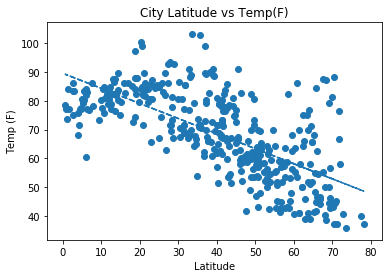

In [76]:
tired_of_typing(n_df['latitude'], n_df['temperature'], n_tslope, n_tintercept)

plt.title('City Latitude vs Temp(F)')

plt.xlabel('Latitude')

plt.ylabel('Temp (F)')

print(f"r value equals {n_trvalue}")

plt.savefig('north_tempvslat.png')

 r value is 0.771001242812385


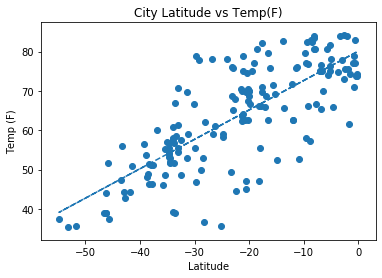

In [77]:
tired_of_typing(s_df['latitude'], s_df['temperature'], s_tslope, s_tintercept)

plt.title('City Latitude vs Temp(F)')

plt.xlabel('Latitude')

plt.ylabel('Temp (F)')

print(f" r value is {s_trvalue}")

plt.savefig('south_tempvslat.png')

#as you can see from the northern and southern temperature plots, temperature has a negative correlation in the 
#northern hemisphere and a positive correlation in the southern. this means that from either pole, as you approach the equator
#you can expect a rise in temperature

 r value is -0.030825915873022254
 Average humidity of the northern hemisphere is 67.31758530183727%


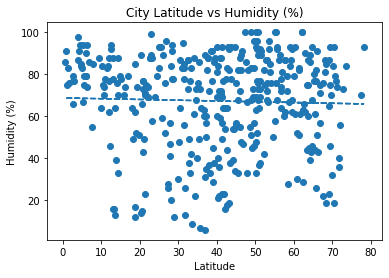

In [78]:
tired_of_typing(n_df['latitude'],n_df['humidity'], n_hslope, n_hintercept)

plt.title('City Latitude vs Humidity (%)')

plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

nh_avg = n_df['humidity'].mean()

print(f" r value is {n_hrvalue}")

print(f" Average humidity of the northern hemisphere is {nh_avg}%")

plt.savefig('north_humvslat.png')

 Average humidity of the southern hemisphere is 77.54385964912281%
r value is -0.031242344637848595


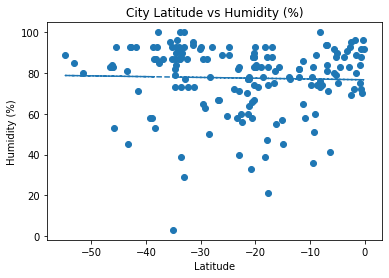

In [79]:
tired_of_typing(s_df['latitude'],s_df['humidity'], s_hslope, s_hintercept)

plt.title('City Latitude vs Humidity (%)')

plt.xlabel('Latitude')

plt.ylabel('Humidity (%)')

sh_avg = s_df['humidity'].mean()

print(f" Average humidity of the southern hemisphere is {sh_avg}%")

print(f"r value is {s_hrvalue}")

plt.savefig('south_humvslat.png')

#these graphs go to show that there little correlation between humidity and latitude, given r values of -.033 and .08.
#however, it might be interesting to note that the southern hemisphere seems to be ~8% more humid on average


r value is 0.08311985279156281


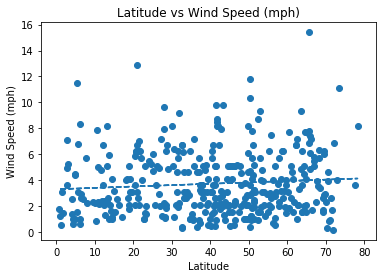

In [80]:
tired_of_typing(n_df['latitude'], n_df['windiness'], n_wslope, n_wintercept)

plt.title('Latitude vs Wind Speed (mph)')

plt.xlabel('Latitude')

plt.ylabel('Wind Speed (mph)')

print(f"r value is {n_wrvalue}")

plt.savefig('north_windvslat.png')

 r value is -0.03567358426571273


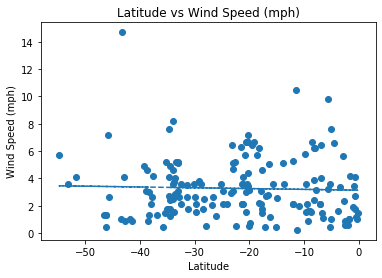

In [81]:
tired_of_typing(s_df['latitude'], s_df['windiness'], s_wslope, s_wintercept)

plt.title('Latitude vs Wind Speed (mph)')

plt.xlabel('Latitude')

plt.ylabel('Wind Speed (mph)')

print(f" r value is {s_wrvalue}")

plt.savefig('south_windvslat.png')

#wind does not seem to be dependent on latitude

r value i -0.021220109582788447


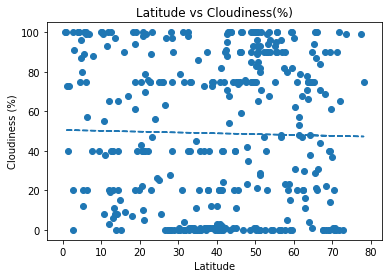

In [82]:
tired_of_typing(n_df['latitude'], n_df['cloudiness'], n_cslope, n_cintercept)

plt.title('Latitude vs Cloudiness(%)')

plt.xlabel('Latitude')

plt.ylabel('Cloudiness (%)')

print(f"r value i {n_crvalue}")

plt.savefig('north_cloudvslat.png')

r value is -0.13500152574831034


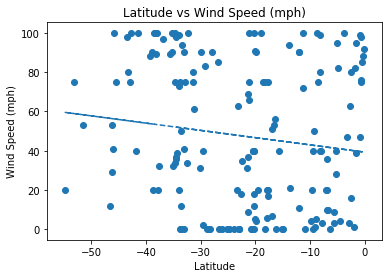

In [83]:
tired_of_typing(s_df['latitude'], s_df['cloudiness'], s_cslope, s_cintercept)

plt.title('Latitude vs Wind Speed (mph)')

plt.xlabel('Latitude')

plt.ylabel('Wind Speed (mph)')

print(f"r value is {s_crvalue}")

plt.savefig('south_windvslat.png')

#cloudiness does not seem to be dependent on latitude

In [84]:
gmaps.configure(api_key = g_key)


In [85]:
#g_lats = bigframe["latitude"]

#g_longs = bigframe["longitude"]

#locations = [g_lats, g_longs]

locations = bigframe[["latitude","longitude"]].to_numpy()

weights = bigframe["humidity"].astype(float)

print(locations.shape)

(552, 2)


In [31]:
fig = gmaps.figure()




heat_layer = gmaps.heatmap_layer(locations, weights = weights)

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))

In [86]:
vacay_frame = pd.DataFrame(bigframe.loc[(bigframe['temperature'] > 77) & (bigframe['temperature'] <80 ) & (bigframe['humidity'] < 80)
                                        &(bigframe['humidity'] > 50) & (bigframe['windiness'] < 10) & (bigframe['cloudiness'] < 10)])

vacation_locations = pd.DataFrame(vacay_frame[['city','country','latitude','longitude','temperature']])

In [87]:
print(vacation_locations)

              city country  latitude  longitude  temperature
44   belushya guba      PF     -9.80    -139.03       79.700
94        pimentel      US     42.25     -75.83       77.918
128         owando      US     34.23     -77.94       79.142
410     barroualie      VN     15.12     108.80       79.448
512       nichinan      BR    -23.99     -46.26       78.008


In [88]:
vacay_frame.count()



city           5
country        5
latitude       5
longitude      5
temperature    5
humidity       5
windiness      5
cloudiness     5
dtype: int64

In [102]:
locations1 = vacation_locations[['latitude','longitude']].to_numpy()

locations1 = list(locations)



In [100]:
vacation_locations['hotel name'] = ""



In [110]:
#hotel_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json="
 

    
params = {
        
        
        #"rankby":"distance",
        "radius": 5000,
        "type": "lodging",
        "key": g_key}
    
for index, row in vacation_locations.iterrows():
        
        one = row['latitude']
        
        two = row['longitude']
        
        params["location"] = f"{one},{two}"
        
        hotel_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

        hotel_response = requests.get(hotel_url, params = params)
        
        hotel_response = hotel_response.json()
        
        
         
        try:
        #results = hotel_response['results']
        
            vacation_locations.loc[index, 'hotel name'] = hotel_response["results"][0]["name"]
        
        #vacation_locations.loc[index, 'city'] = hotel_response["results"][0]["vicinity"]
        
        
        except(KeyError, IndexError):
    
            print('missing')
        
        
print("------")
    
    

    


------


In [111]:
vacation_locations.head()

,city,country,latitude,longitude,temperature,hotel name
44,belushya guba,PF,-9.80,-139.03,79.700,Villa Enata
94,pimentel,US,42.25,-75.83,77.918,Chenango Valley State Park
128,owando,US,34.23,-77.94,79.142,"Hotel Ballast Wilmington, Tapestry Collection ..."
410,barroualie,VN,15.12,108.80,79.448,Central Hotel
512,nichinan,BR,-23.99,-46.26,78.008,Charme Hotel Guarujá


In [112]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{hotel name}</dd>
<dt>City</dt><dd>{city}</dd>
<dt>Country</dt><dd>{country}</dd>
</dl>"""

hotel_info = [info_box_template.format(**row) for index, row in vacation_locations.iterrows()]

marker_layer = gmaps.marker_layer(locations1, info_box_content=hotel_info)

fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))